In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [9]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
x=df
y=df['Exited']
x.drop(columns='Exited',inplace=True)
print(x.shape, y.shape)

(10000, 11) (10000,)


In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=123 )

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)

In [13]:
xtrain_scaled

array([[ 0.76549331, -0.84229272,  1.72352467, ..., -0.57946723,
        -0.57677292,  0.90682052],
       [-0.4455051 ,  0.01205581,  1.72352467, ..., -0.57946723,
        -0.57677292, -1.10275404],
       [ 1.38651814, -0.36765465, -0.69673114, ..., -0.57946723,
         1.73378459,  0.90682052],
       ...,
       [ 0.36182718, -1.79156887, -0.35098031, ..., -0.57946723,
        -0.57677292,  0.90682052],
       [-0.0728902 , -0.84229272, -0.00522948, ..., -0.57946723,
        -0.57677292,  0.90682052],
       [ 0.37217759, -0.36765465, -0.35098031, ..., -0.57946723,
        -0.57677292,  0.90682052]])

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model=Sequential()

In [16]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history=model.fit(xtrain_scaled,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100


e:\newpy\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


200/200 [==============================] - 1s 2ms/step - loss: 0.5452 - accuracy: 0.7875 - val_loss: 0.4876 - val_accuracy: 0.7919
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.8005 - val_loss: 0.4401 - val_accuracy: 0.7962
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8155 - val_loss: 0.4211 - val_accuracy: 0.8206
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8239 - val_loss: 0.4104 - val_accuracy: 0.8338
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8264 - val_loss: 0.3999 - val_accuracy: 0.8381
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8322 - val_loss: 0.3895 - val_accuracy: 0.8431
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8400 - val_loss: 0.3808 - val_accuracy: 0.8456
Epoch 8/100

In [19]:
model.layers[0].get_weights()

[array([[-2.0773412e-01, -1.2612380e-01,  1.3250084e-01,  8.0337882e-02,
          1.6314352e-01, -5.1669642e-02,  1.5559539e-01,  1.7104287e-01,
         -1.1532600e-01,  3.0571178e-01, -1.9394642e-01],
        [ 5.9703773e-01,  2.8852922e-01, -5.1655322e-01,  1.1395366e+00,
         -5.7175707e-02,  4.2704884e-02, -3.8913244e-01, -3.7330219e-01,
          2.5360993e-01,  3.9343238e-01, -4.2432502e-01],
        [-6.8291217e-02,  1.1598955e-01, -2.7096900e-01, -2.2348854e-01,
         -2.2428608e-01, -4.0587407e-01,  8.9666553e-02, -4.6522677e-02,
          7.3165268e-02, -2.5460932e-01,  4.4890997e-01],
        [-4.5424819e-02,  7.7807896e-02,  2.0057514e-01, -2.3836106e-01,
         -3.5804000e-01,  3.5365239e-01, -7.8497434e-01, -5.0327981e-01,
          2.7867875e-03,  1.7604119e-01, -6.2595260e-01],
        [-8.5713845e-01,  2.4089240e-01, -5.6443900e-01, -3.4657550e-01,
         -2.9353526e-01, -3.0706322e-02, -1.0202162e+00, -1.8024798e-01,
          8.9371061e-01,  5.6998825e-0

In [20]:
y_log=model.predict(xtest_scaled)
pred=np.where(y_log>0.5,1,0)

63/63 [==============================] - 0s 752us/step


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.856

In [22]:
history.history

{'loss': [0.545160174369812,
  0.4585418999195099,
  0.4294581711292267,
  0.4151703119277954,
  0.4037902057170868,
  0.39269688725471497,
  0.3824407458305359,
  0.3732839524745941,
  0.3656735122203827,
  0.3604862689971924,
  0.355393648147583,
  0.35204434394836426,
  0.34755274653434753,
  0.3456555902957916,
  0.3439301550388336,
  0.3422161042690277,
  0.3405236303806305,
  0.3398994207382202,
  0.33932170271873474,
  0.3384314775466919,
  0.33802834153175354,
  0.3373726010322571,
  0.33661988377571106,
  0.33619800209999084,
  0.33569076657295227,
  0.33537188172340393,
  0.335092693567276,
  0.3340531289577484,
  0.33387652039527893,
  0.3333803415298462,
  0.3331921100616455,
  0.33314210176467896,
  0.3324699401855469,
  0.3321090638637543,
  0.3326587975025177,
  0.3317593038082123,
  0.3323115110397339,
  0.3315281271934509,
  0.33053267002105713,
  0.33101722598075867,
  0.33102482557296753,
  0.3306293189525604,
  0.330381840467453,
  0.32977578043937683,
  0.330260425

In [23]:
import matplotlib.pyplot as plt

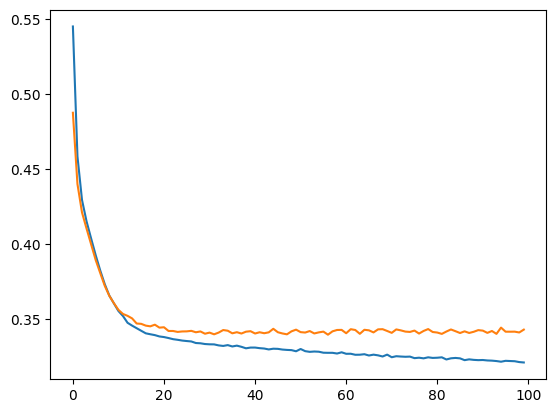

In [24]:
history.history

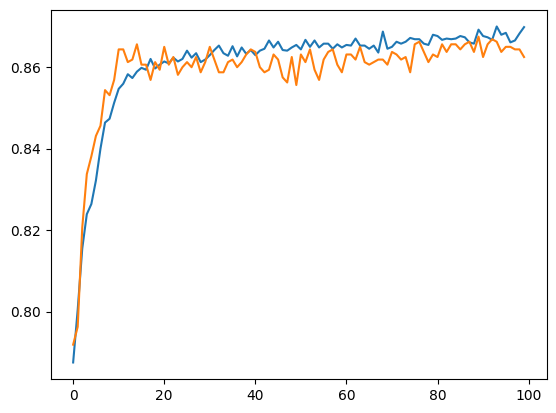

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])